### LGM-VIP Data Science Internship Programme

### Pratima Yadav

### BEGINNER LEVEL TASK-02

### Name-Stock Market Prediction And Forecasting Using Stacked LSTM

### Language-Python

### Software-Jupyter Notebook

### Dataset-https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

#### Importing the required libarairies

In [1]:
#for visualizing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#For processing the data
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.shape

(2035, 8)

In [6]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [39]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [42]:
#Checking if there are any null values or not
data.isna()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [41]:
data.isna().count()

Date                    2035
Open                    2035
High                    2035
Low                     2035
Last                    2035
Close                   2035
Total Trade Quantity    2035
Turnover (Lacs)         2035
dtype: int64

#### Sorting the dataset

In [8]:
#Converting the object into date type
data['Date']=pd.to_datetime(data['Date'])

In [9]:
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
#making the changes done permanent
df.reset_index(inplace=True)

In [14]:
df.head()

,level_0,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


#### Visualization

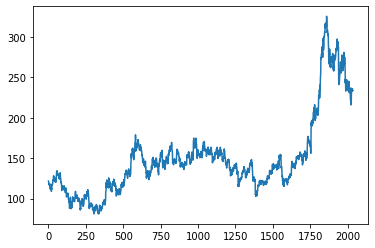

In [15]:
plt.plot(df['Close'])

In [16]:
dff=df['Close']

In [17]:
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

#### MIn Max Scaler

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))

In [19]:
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

#### Spliting the dataset

In [20]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

#### Convert an array of values into a dataset matrix

In [22]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

#### Spilting the dataset into training and test set

In [27]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [24]:
X_test.shape

(510, 100)

In [25]:
X_train.shape

(1323, 100)

In [28]:
Y_test.shape

(510,)

In [29]:
Y_train.shape

(1323,)

In [31]:
#reshaping the set
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#### Creating the LSTM Model

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 6s 171ms/step - loss: 0.0119 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 2s 121ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 2s 122ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 2s 126ms/step - loss: 8.4147e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 133ms/step - loss: 8.2075e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 118ms/step - loss: 7.9738e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 3s 135ms/step - loss: 7.8850e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 2s 130ms/step - loss: 7.5154e-04 - val_loss: 9.7150e-04
Epoch 9/60
19/19 [==============================] - 2s 126ms/step - loss: 7.4858e-04 - val_loss: 9.3839e-04
Epoch 10/60
19/19 [==============================] - 2s 128ms/step -

#### Predicting the model

In [34]:
test_predict=model.predict(X_test)

In [35]:
test_predicted=scaler.inverse_transform(test_predict)

In [36]:
test_predicted

array([[141.88652 ],
       [142.02267 ],
       [141.10225 ],
       [138.37657 ],
       [136.60281 ],
       [136.19577 ],
       [137.61781 ],
       [139.43774 ],
       [139.85289 ],
       [139.21219 ],
       [138.68767 ],
       [139.80258 ],
       [140.8115  ],
       [142.48912 ],
       [144.7443  ],
       [142.76857 ],
       [139.92784 ],
       [139.35867 ],
       [140.27623 ],
       [145.59416 ],
       [150.47253 ],
       [152.51382 ],
       [152.2256  ],
       [149.63496 ],
       [149.20465 ],
       [149.40794 ],
       [150.24458 ],
       [152.14589 ],
       [152.94325 ],
       [152.70749 ],
       [152.8044  ],
       [151.60912 ],
       [148.36389 ],
       [142.67554 ],
       [139.22542 ],
       [138.57414 ],
       [139.16388 ],
       [138.52788 ],
       [135.96066 ],
       [131.86208 ],
       [129.02812 ],
       [127.907005],
       [126.13377 ],
       [125.374306],
       [123.4352  ],
       [120.70849 ],
       [119.79181 ],
       [119.5

#### Calcualting the performance

In [37]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))

In [38]:
performance

0.04263742093820337